In [1]:
%load_ext autoreload
%autoreload 2

# 2D Transformations

![alt text](../images/ch_2_4_transforms_2d.png "Logo Title Text 1")

In [2]:
import sys
import os
__src_dir__ = os.path.abspath('../src')
assert os.path.exists(__src_dir__), "'src' dir not found: " + __src_dir__
if __src_dir__ not in sys.path:
    sys.path.append(__src_dir__)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import uniform as rand_rng

In [4]:
from mvg.synth_data_gen import (
        make_4sq_img, 
        plot_rect_pts, 
        transform_rect_pts,
)

from mvg.transforms_2d import MakeTf2d, RandTf2d

# Euclidean Transform
---
![alt text](../images/ch_2_4_transforms_2d_euclidean.png "Logo Title Text 1")

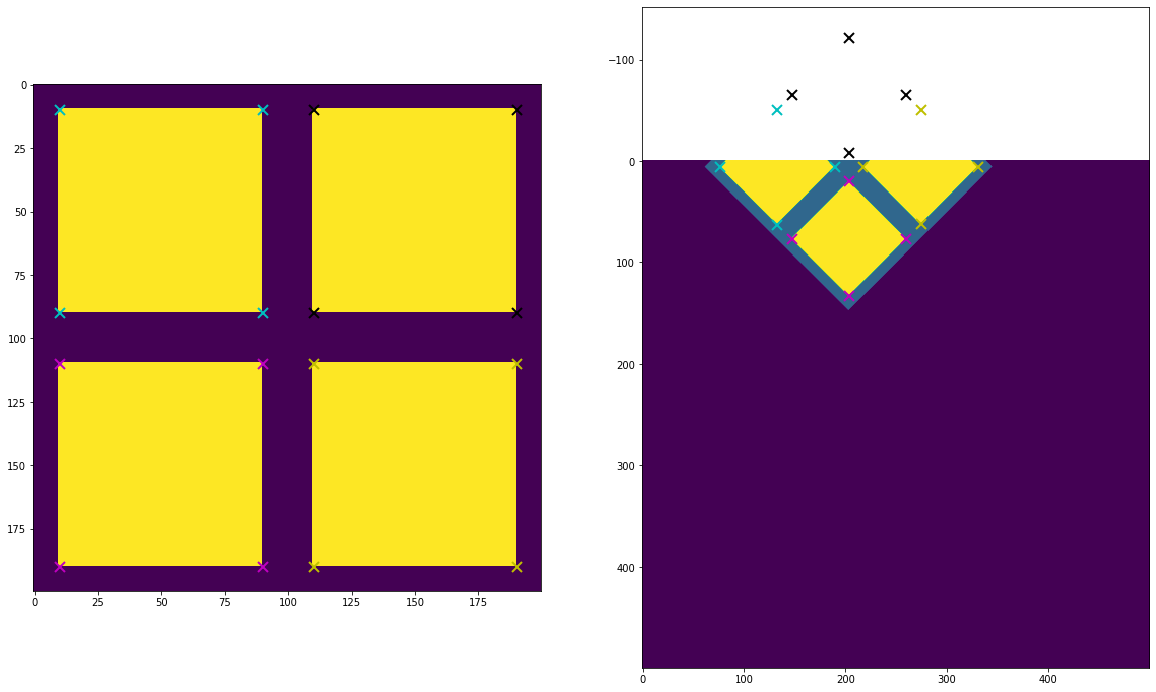

In [5]:
M = RandTf2d.similarity(
        rot_rng=(-0.9, 0.1),
        t_x_rng=(10, 100), 
        t_y_rng=(10, 100),
        scale_rng=(1, 1),  ## <--- same as similarity but no scale
)

img, rect_pts = make_4sq_img(scale_by=2)
img_ = cv2.warpPerspective(img, M, (500, 500))
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(img_)
plot_rect_pts(ax[0], rect_pts, markersize=10, markeredgewidth=2)
plot_rect_pts(ax[1], transform_rect_pts(M, rect_pts), markersize=10, markeredgewidth=2)

<br><br><br><br>

# Similarity Transform
---

![alt text](../images/ch_2_4_transforms_2d_similarity.png "Logo Title Text 1")

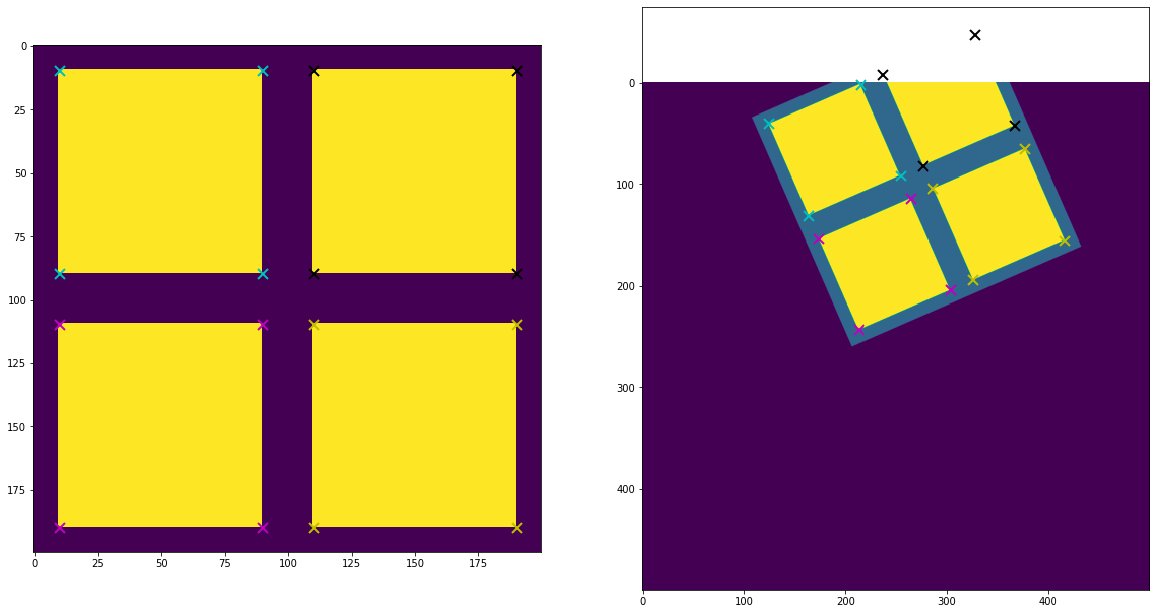

In [6]:
M = RandTf2d.similarity(
        rot_rng=(-0.9, 0.1),
        t_x_rng=(10, 100), 
        t_y_rng=(10, 100),
        scale_rng=(0.5, 1.5),
)

img, rect_pts = make_4sq_img(scale_by=2)
img_ = cv2.warpPerspective(img, M, (500, 500))
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(img_)
plot_rect_pts(ax[0], rect_pts, markersize=10, markeredgewidth=2)
plot_rect_pts(ax[1], transform_rect_pts(M, rect_pts), markersize=10, markeredgewidth=2)

<br><br><br><br>

# Affine Transform
---
![alt text](../images/ch_2_4_transforms_2d_affine.png "Logo Title Text 1")
<br><br><br>
![alt text](../images/ch_2_4_3_affine.png "Logo Title Text 1")

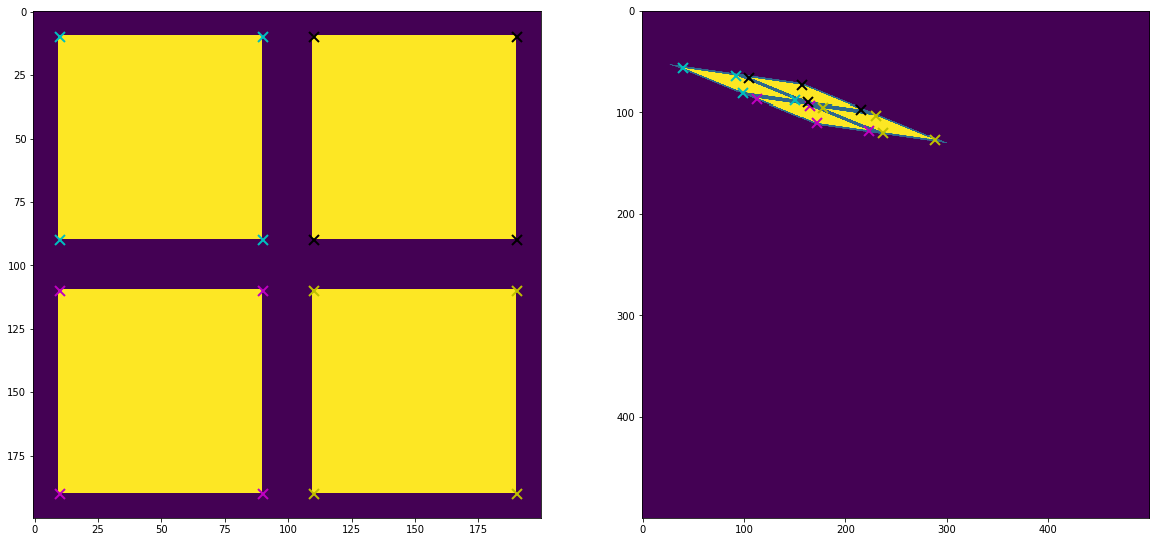

In [7]:
M = RandTf2d.affine(
        theta_rng=(-0.9, 0.1),
        phi_rng=(-0.9, 0.1),
        scale_x_rng=(0.9, 1.1),
        scale_y_rng=(0., 1.1), 
        t_x_rng=(10, 100), 
        t_y_rng=(10, 100),
)

M = M[:2, :]
img, rect_pts = make_4sq_img(scale_by=2)
img_ = cv2.warpAffine(img, M, (500, 500))
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(img_)
plot_rect_pts(ax[0], rect_pts, markersize=10, markeredgewidth=2)
plot_rect_pts(ax[1], transform_rect_pts(M, rect_pts), markersize=10, markeredgewidth=2)

<br><br><br><br>

# Projective Transform
---

![alt text](../images/ch_2_4_projective.png "Logo Title Text 1")

Projective Transform is similar to **Affine Transform** except it has the additional parameter $\mathbf{v^T}$.
<br><br>
_Affine Transform:_
<center>
$
\mathbf{x'} = \mathbf{H}_p\mathbf{x} =  \begin{bmatrix}
  \mathbf{A}_{2\times2} & \mathbf{t} \\
  \mathbf{0}^T & 1
 \end{bmatrix}_{3\times3} \mathbf{x}
$
</center>

_Projective Transform (Notice the differences <u>**underscored**</u>):_ 

<center>
$
\mathbf{x'} = \mathbf{H}_p\mathbf{x} =  \begin{bmatrix}
  \mathbf{A}_{2\times2} & \mathbf{t} \\
  \underline{\mathbf{v^T}} & \underline{v}
 \end{bmatrix}_{3\times3} \mathbf{x}
$
</center>


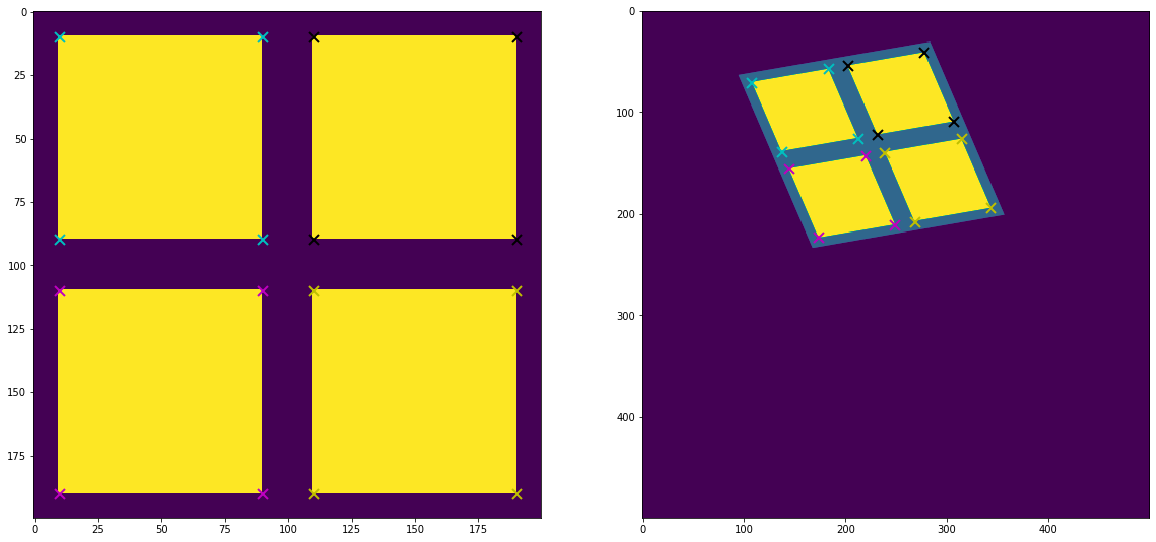

In [8]:
M = MakeTf2d.projective(
        theta=rand_rng(-0.9, 0.1),
        phi=rand_rng(-0.9, 0.1),
        scale_x=rand_rng(0.9, 1.1),
        scale_y=rand_rng(0., 1.1), 
        t_x=rand_rng(10, 100), 
        t_y=rand_rng(10, 100),
        v_x=rand_rng(0, 1),
        v_y=rand_rng(0, 1),
)

M = M[:2, :]
img, rect_pts = make_4sq_img(scale_by=2)
img_ = cv2.warpAffine(img, M, (500, 500))
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img)
ax[1].imshow(img_)
plot_rect_pts(ax[0], rect_pts, markersize=10, markeredgewidth=2)
plot_rect_pts(ax[1], transform_rect_pts(M, rect_pts), markersize=10, markeredgewidth=2)